## Getting data using trends api

In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import time
# Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=360)
#pytrends = TrendReq(retries=3)


## Intel works very well with pytrends sell=85 and buy=78 and even with tech indicators, not additional tech indicators

# Define the search keyword
keyword = 'Gold'

# Set timeframe for analysis
# timeframe = '2023-06-01 2024-12-01'

# # Fetch interest over time
# pytrends.build_payload([keyword], timeframe=timeframe)
# trends_data = pytrends.interest_over_time()

# # Drop 'isPartial' column if it exists
# if 'isPartial' in trends_data.columns:
#     trends_data.drop(columns=['isPartial'], inplace=True)

timeframes = [
    '2018-01-01 2018-05-31',
    '2018-06-01 2019-01-01',
    '2019-01-02 2019-06-01',
    '2019-06-02 2020-01-01',
    '2020-01-02 2020-06-01',
    '2020-06-02 2021-01-01',
    '2021-01-02 2021-06-01',
    '2021-06-02 2022-01-01',
    '2022-01-02 2022-06-01',
    '2022-06-02 2023-01-01',
    '2023-01-01 2023-05-31',
    '2023-06-01 2024-01-01',
    '2024-01-02 2024-06-01',
    '2024-06-02 2024-12-04',
]

# Fetch and combine data for all timeframes
all_trends_data = []
for timeframe in timeframes:
    pytrends.build_payload([keyword], timeframe=timeframe)
    trends_data = pytrends.interest_over_time()
    all_trends_data.append(trends_data)
    time.sleep(5)
# Concatenate all the dataframes into one
daily_trends_data = pd.concat(all_trends_data)

# Drop duplicates and reset index
daily_trends_data = daily_trends_data[~daily_trends_data.index.duplicated(keep='first')].reset_index()
if 'isPartial' in trends_data.columns:
     daily_trends_data.drop(columns=['isPartial'], inplace=True)

# Preview the daily trends data
print(daily_trends_data.head())
daily_trends_data = daily_trends_data.reset_index()
daily_trends_data.rename(columns={'date': 'Date'}, inplace=True)

# Preview the data
print(daily_trends_data.head())
print(daily_trends_data.columns)

daily_trends_data.to_csv('daily_trends_data_gold.csv', index=False)



## Getting manual data

In [56]:


csv_files = [
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2018-01-01 2018-05-31.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2018-06-01 2019-01-01.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2019-01-02 2019-06-01.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2019-06-02 2020-01-01.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2020-01-02 2020-06-01.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2020-06-02 2021-01-01.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2021-01-02 2021-06-01.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2021-06-02 2022-01-01.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2022-01-02 2022-06-01.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2022-06-02 2023-01-01.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2023-01-01 2023-05-31.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2023-06-01 2024-01-01.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2024-01-02 2024-06-01.csv',
    '/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/2024-06-02 2024-12-04.csv',
]
# Initialize an empty list to hold DataFrames

# Specify the folder containing your CSV files
file_pattern = "/Users/ronitgandhi/Desktop_windows/RUTGERS/SEM 3/Algo Trading/ATPM project/Gold Data/*.csv"

import pandas as pd
import glob

# Define the file pattern for the CSV files, adjust the path as needed
csv_files = glob.glob(file_pattern)

# Function to load and preprocess a single file
def load_preprocess_csv(file):
    # Load the CSV file, skipping the first row which contains the category
    df = pd.read_csv(file, skiprows=1)
    # Rename columns
    df.columns = ['Date', 'Gold']
    # Convert 'Date' column to datetime type if it's not already
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Load all CSV files and merge them into a single DataFrame
daily_trends_data = pd.concat([load_preprocess_csv(file) for file in csv_files])

# Merge based on the date, sorting by date
daily_trends_data.sort_values('Date', inplace=True)

# Reset index after sorting
daily_trends_data.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
print(daily_trends_data.head())

daily_trends_data.to_csv('all_data_gold.csv', index=False)

        Date  Gold
0 2018-01-01    60
1 2018-01-02    60
2 2018-01-03    59
3 2018-01-04    59
4 2018-01-05    61


In [3]:
import yfinance as yf

# Fetch historical gold price data
gold_data = yf.download('GC=F', start='2018-01-01', end='2023-06-04')

# Keep relevant columns
gold_data = gold_data[['Close']]
gold_data.rename(columns={'Close': 'Gold Price'}, inplace=True)

# Preview the data
print(gold_data.head())
# Reset the index to move the multi-level index into columns
gold_data = gold_data.reset_index()

# Rename columns for clarity
gold_data.columns = ['Date', 'Gold Price']

# Drop any unwanted levels like 'Ticker' or 'Price' if they still exist
gold_data = gold_data[['Date', 'Gold Price']]

# Preview the cleaned DataFrame
print(gold_data.head())



[*********************100%***********************]  1 of 1 completed

Price                       Gold Price
Ticker                            GC=F
Date                                  
2018-01-02 00:00:00+00:00  1313.699951
2018-01-03 00:00:00+00:00  1316.199951
2018-01-04 00:00:00+00:00  1319.400024
2018-01-05 00:00:00+00:00  1320.300049
2018-01-08 00:00:00+00:00  1318.599976
                       Date   Gold Price
0 2018-01-02 00:00:00+00:00  1313.699951
1 2018-01-03 00:00:00+00:00  1316.199951
2 2018-01-04 00:00:00+00:00  1319.400024
3 2018-01-05 00:00:00+00:00  1320.300049
4 2018-01-08 00:00:00+00:00  1318.599976


In [57]:
import pandas as pd

# Load the data from the CSV file
file_path = '1D_XAUUSD_Candlestick_BID_01.01.2020-31.08.2024.csv'
data = pd.read_csv(file_path)

# Attempt to directly parse 'Local time' with flexible parsing
data['Local time'] = pd.to_datetime(data['Local time'], errors='coerce', infer_datetime_format=True)

# Check for any rows where 'Local time' could not be parsed
print("Rows with unparseable dates:", data['Local time'].isna().sum())

# Select and rename the columns to focus on 'Date' and 'Gold Price' only
gold_data = data[['Local time', 'Close']].rename(columns={'Local time': 'Date', 'Close': 'Gold Price'})

# Display the first few rows of the new DataFrame to verify correctness
print(gold_data.head())




Rows with unparseable dates: 0
        Date  Gold Price
0 2020-01-02    1538.715
1 2020-01-03    1551.515
2 2020-01-06    1559.165
3 2020-01-07    1593.105
4 2020-01-08    1558.325


/var/folders/2v/418w7x5d03g34d38xmfssx8h0000gn/T/ipykernel_82056/3645433638.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Local time'] = pd.to_datetime(data['Local time'], errors='coerce', infer_datetime_format=True)


In [58]:

# Convert both Date columns to naive datetime objects

#daily_trends_data=pd.read_csv('daily_trends_data_gold.csv')

daily_trends_data['Date'] = pd.to_datetime(daily_trends_data['Date']).dt.tz_localize(None)
gold_data['Date'] = pd.to_datetime(gold_data['Date']).dt.tz_localize(None)

print(daily_trends_data.head())
print(gold_data.head())
# Perform the merge
merged_data = pd.merge(daily_trends_data, gold_data, on='Date', how='inner')

# Preview the merged data
print(merged_data.head())

# # Drop unnecessary columns
# columns_to_drop = ['level_0', 'index', 'Date']
# merged_data = merged_data.drop(columns=[col for col in columns_to_drop if col in merged_data.columns])

# # Preview the cleaned DataFrame
# print(merged_data.head())

# merged_data.rename(columns={'date': 'Date'}, inplace=True)
merged_data.rename(columns={'gold': 'Gold interest'}, inplace=True)

print(merged_data.head())

merged_data.to_csv('mereged_data_gold.csv', index=False)



        Date  Gold
0 2018-01-01    60
1 2018-01-02    60
2 2018-01-03    59
3 2018-01-04    59
4 2018-01-05    61
        Date  Gold Price
0 2020-01-02    1538.715
1 2020-01-03    1551.515
2 2020-01-06    1559.165
3 2020-01-07    1593.105
4 2020-01-08    1558.325
        Date  Gold  Gold Price
0 2020-01-02    87    1538.715
1 2020-01-03    87    1551.515
2 2020-01-06    91    1559.165
3 2020-01-07    86    1593.105
4 2020-01-08    88    1558.325
        Date  Gold  Gold Price
0 2020-01-02    87    1538.715
1 2020-01-03    87    1551.515
2 2020-01-06    91    1559.165
3 2020-01-07    86    1593.105
4 2020-01-08    88    1558.325


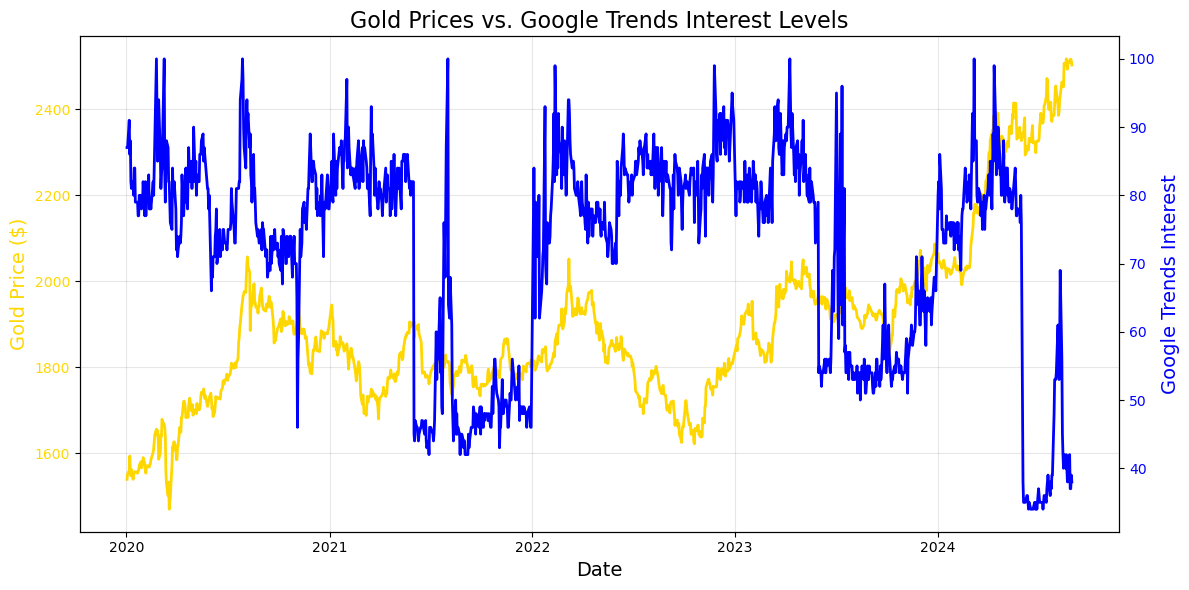

In [59]:
import matplotlib.pyplot as plt

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Gold Prices on the primary y-axis (left)
ax1.plot(merged_data['Date'], merged_data['Gold Price'], label='Gold Price ($)', color='gold', linewidth=2)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Gold Price ($)', color='gold', fontsize=14)
ax1.tick_params(axis='y', labelcolor='gold')
ax1.grid(alpha=0.3)

# Create a secondary y-axis (right) for Google Trends Interest Levels
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['Gold'], label='Google Trends Interest', color='blue', linewidth=2)
ax2.set_ylabel('Google Trends Interest', color='blue', fontsize=14)
ax2.tick_params(axis='y', labelcolor='blue')

# Add Titles and Legends
plt.title('Gold Prices vs. Google Trends Interest Levels', fontsize=16)
fig.tight_layout()

# Show the plot
plt.show()


## Pytrends and technical Indicators

Merged data with signals saved to 'gold_trading_signals_with_technical_and_pytrends.csv'.


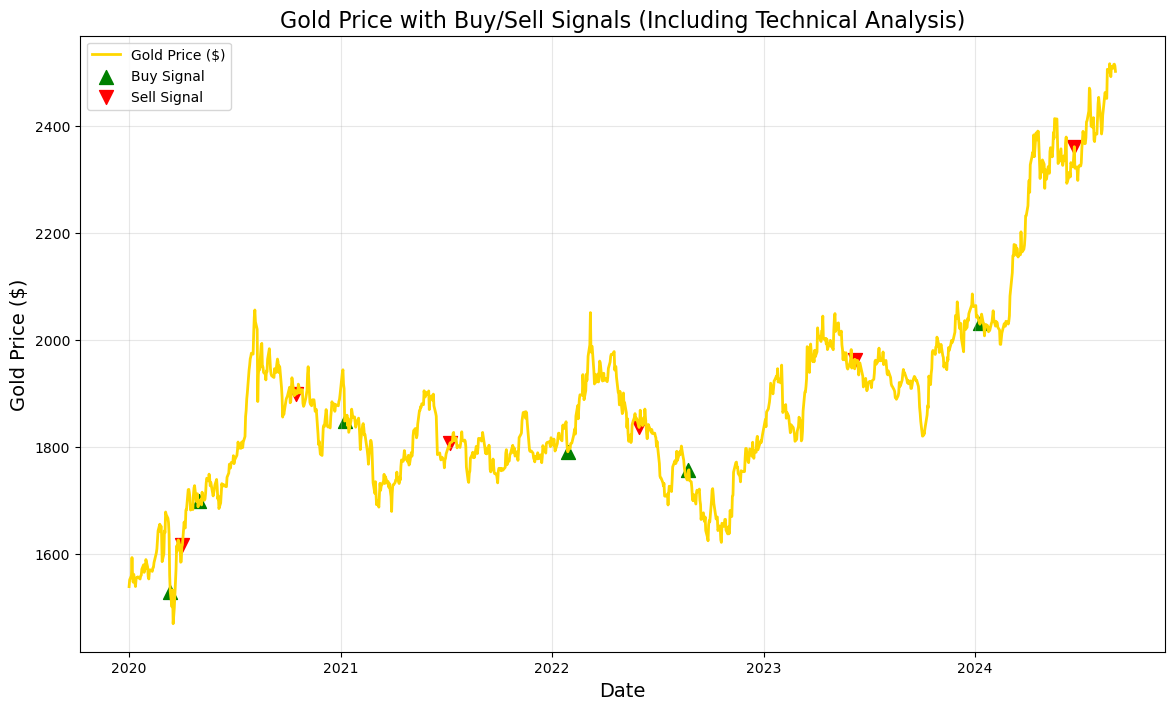

In [83]:
import matplotlib.pyplot as plt

# Define thresholds
high_threshold = 70 # Buy threshold for interest level
low_threshold = 75  # Sell threshold for interest level

# Add moving averages and RSI for technical analysis
merged_data['SMA_20'] = merged_data['Gold Price'].rolling(window=20).mean()
merged_data['SMA_50'] = merged_data['Gold Price'].rolling(window=50).mean()

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

merged_data['RSI'] = calculate_rsi(merged_data['Gold Price'])

# Initialize signals
merged_data['Signal'] = 0
merged_data['Action'] = 'Hold'

# Track position and waiting period for sell signal
position_open = False
days_below_threshold = 0

for index, row in merged_data.iterrows():
    price = row['Gold Price']
    interest = row['Gold']
    sma_20 = row['SMA_20']
    sma_50 = row['SMA_50']
    rsi = row['RSI']
    
    # Buy signal: Interest > high_threshold, golden cross, RSI < 30
    if not position_open and interest > high_threshold and sma_20 > sma_50 and rsi < 50:
        merged_data.at[index, 'Signal'] = 1
        merged_data.at[index, 'Action'] = 'Buy'
        position_open = True
        days_below_threshold = 0  # Reset days below threshold
    
    # Sell signal: Interest < low_threshold for at least 4 days, death cross, RSI > 70
    elif position_open:
        if interest < low_threshold:
            days_below_threshold += 1
        else:
            days_below_threshold = 0  # Reset counter if interest rises above threshold

        if days_below_threshold >= 4 and sma_20 < sma_50 and rsi > 50:  # Sell condition met
            merged_data.at[index, 'Signal'] = -1
            merged_data.at[index, 'Action'] = 'Sell'
            position_open = False
            days_below_threshold = 0  # Reset counter after selling

# Extract buy and sell signal dates
buy_signals = merged_data[merged_data['Signal'] == 1]
sell_signals = merged_data[merged_data['Signal'] == -1]

# Save the final data to a CSV for future analysis
final_data = merged_data[['Date', 'Gold Price', 'Gold', 'SMA_20', 'SMA_50', 'RSI', 'Signal', 'Action']]
final_data.to_csv('gold_trading_signals_with_technical_and_pytrends.csv', index=False)

print("Merged data with signals saved to 'gold_trading_signals_with_technical_and_pytrends.csv'.")

# Plot Gold Prices and Buy/Sell Signals
plt.figure(figsize=(14, 8))

# Plot gold prices
plt.plot(merged_data['Date'], merged_data['Gold Price'], label='Gold Price ($)', color='gold', linewidth=2)

# Plot buy signals
plt.scatter(buy_signals['Date'], buy_signals['Gold Price'], color='green', label='Buy Signal', marker='^', s=100)

# Plot sell signals
plt.scatter(sell_signals['Date'], sell_signals['Gold Price'], color='red', label='Sell Signal', marker='v', s=100)

# Add titles and labels
plt.title('Gold Price with Buy/Sell Signals (Including Technical Analysis)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Gold Price ($)', fontsize=14)

# Add a legend
plt.legend()

# Add grid
plt.grid(alpha=0.3)

# Display the plot
plt.show()



## Only Pytrends Data analysis

Merged data with signals saved to 'gold_trading_signals_with_pytrends_only.csv'.


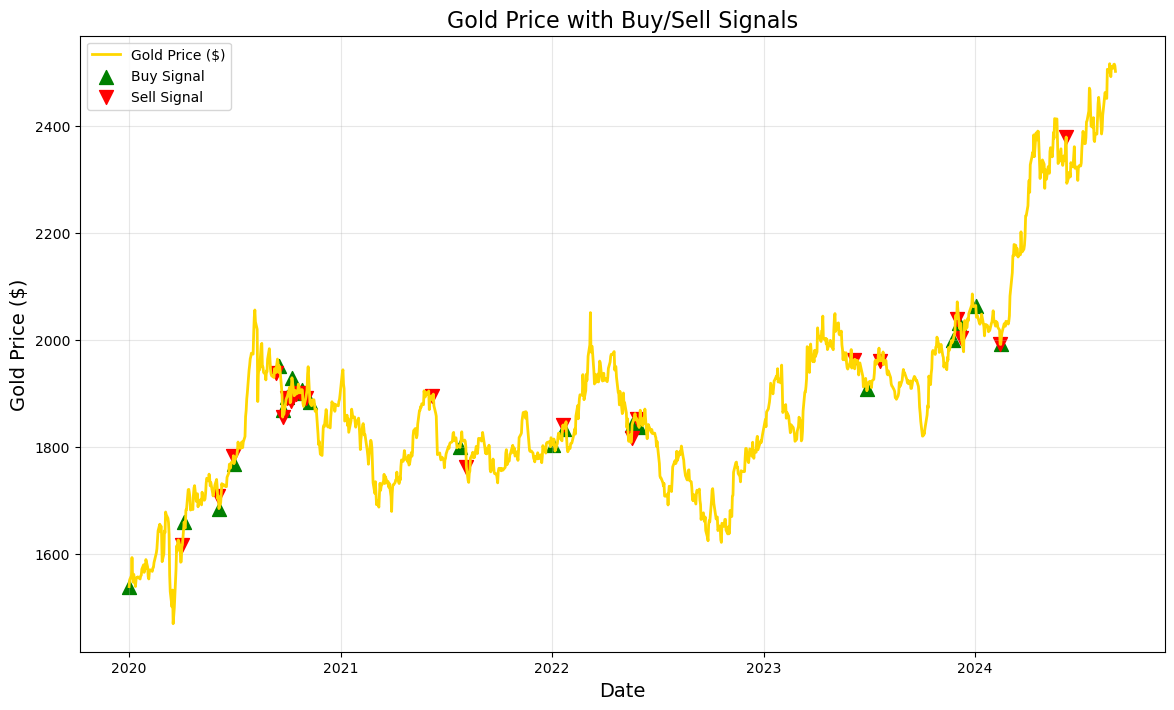

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Define high and low interest thresholds
high_threshold = 70  # Buy threshold
low_threshold = 75  # Sell threshold

# Add signals for interest levels
merged_data['Signal'] = 0
merged_data['Action'] = 'Hold'

# Track position and waiting period for sell signal
position_open = False
days_below_threshold = 0

for index, row in merged_data.iterrows():
    if not position_open and row['Gold'] > high_threshold:  # Buy signal
        merged_data.at[index, 'Signal'] = 1
        merged_data.at[index, 'Action'] = 'Buy'
        position_open = True
        days_below_threshold = 0  # Reset days below threshold
    elif position_open:
        if row['Gold'] < low_threshold:  # Below sell threshold
            days_below_threshold += 1
        else:
            days_below_threshold = 0  # Reset counter if interest rises above threshold

        if days_below_threshold >= 4:  # Sell condition met
            merged_data.at[index, 'Signal'] = -1
            merged_data.at[index, 'Action'] = 'Sell'
            position_open = False
            days_below_threshold = 0  # Reset counter after selling


# Extract buy and sell signal dates
buy_signals = merged_data[merged_data['Signal'] == 1]
sell_signals = merged_data[merged_data['Signal'] == -1]

# Save the final data to a CSV for future analysis
final_data = merged_data[['Date', 'Gold Price', 'Gold', 'Signal', 'Action']]
final_data.to_csv('gold_trading_signals_with_pytrends_only.csv', index=False)

print("Merged data with signals saved to 'gold_trading_signals_with_pytrends_only.csv'.")

# Plot Gold Prices and Buy/Sell Signals
plt.figure(figsize=(14, 8))
plt.plot(merged_data['Date'], merged_data['Gold Price'], label='Gold Price ($)', color='gold', linewidth=2)
plt.scatter(buy_signals['Date'], buy_signals['Gold Price'], color='green', label='Buy Signal', marker='^', s=100)
plt.scatter(sell_signals['Date'], sell_signals['Gold Price'], color='red', label='Sell Signal', marker='v', s=100)
plt.title('Gold Price with Buy/Sell Signals', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Gold Price ($)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Printing total trades

In [84]:
# Initialize variables
initial_capital = 10000
position = 0
portfolio_value = initial_capital
portfolio_values = []  # Track portfolio value over time
trades = []

# Backtesting loop
for index, row in merged_data.iterrows():
    price = row['Gold Price']
    signal = row['Signal']

    # Buy
    if signal == 1 and position == 0:  # Open a new position
        position = portfolio_value // price  # Number of units to buy
        portfolio_value -= position * price  # Deduct cost of purchase
        trades.append((row['Date'], 'Buy', price, portfolio_value))

    # Sell
    elif signal == -1 and position > 0:  # Close an existing position
        portfolio_value += position * price  # Add proceeds of the sale
        trades.append((row['Date'], 'Sell', price, portfolio_value))
        position = 0  # Reset position

    # Update portfolio value
    current_value = portfolio_value + (position * price if position > 0 else 0)
    portfolio_values.append(current_value)

# Save trade details to a DataFrame
trades_df = pd.DataFrame(trades, columns=['Date', 'Action', 'Price', 'Portfolio Value'])

# Save to CSV
trades_df.to_csv('gold_trades.csv', index=False)

# Print trades
print(trades_df)


         Date Action     Price  Portfolio Value
0  2020-03-13    Buy  1529.348          823.912
1  2020-04-03   Sell  1617.048        10526.200
2  2020-05-01    Buy  1698.818          333.292
3  2020-10-16   Sell  1898.968        11727.100
4  2021-01-08    Buy  1848.508          636.052
5  2021-07-09   Sell  1807.838        11483.080
6  2022-01-28    Buy  1791.028          736.912
7  2022-05-31   Sell  1836.593        11756.470
8  2022-08-24    Buy  1756.294         1218.706
9  2023-06-08   Sell  1963.745        13001.176
10 2024-01-10    Buy  2031.995          809.206
11 2024-06-20   Sell  2362.018        14981.314


## Testing Strategy against buy and hold

Performance Comparison:
Metric                   Strategy       Buy & Hold     
-------------------------------------------------------
Final Portfolio Value    $14981.31       $16266.33       
Cumulative Return (%)    49.81          62.66          
Sharpe Ratio             0.77           0.72           


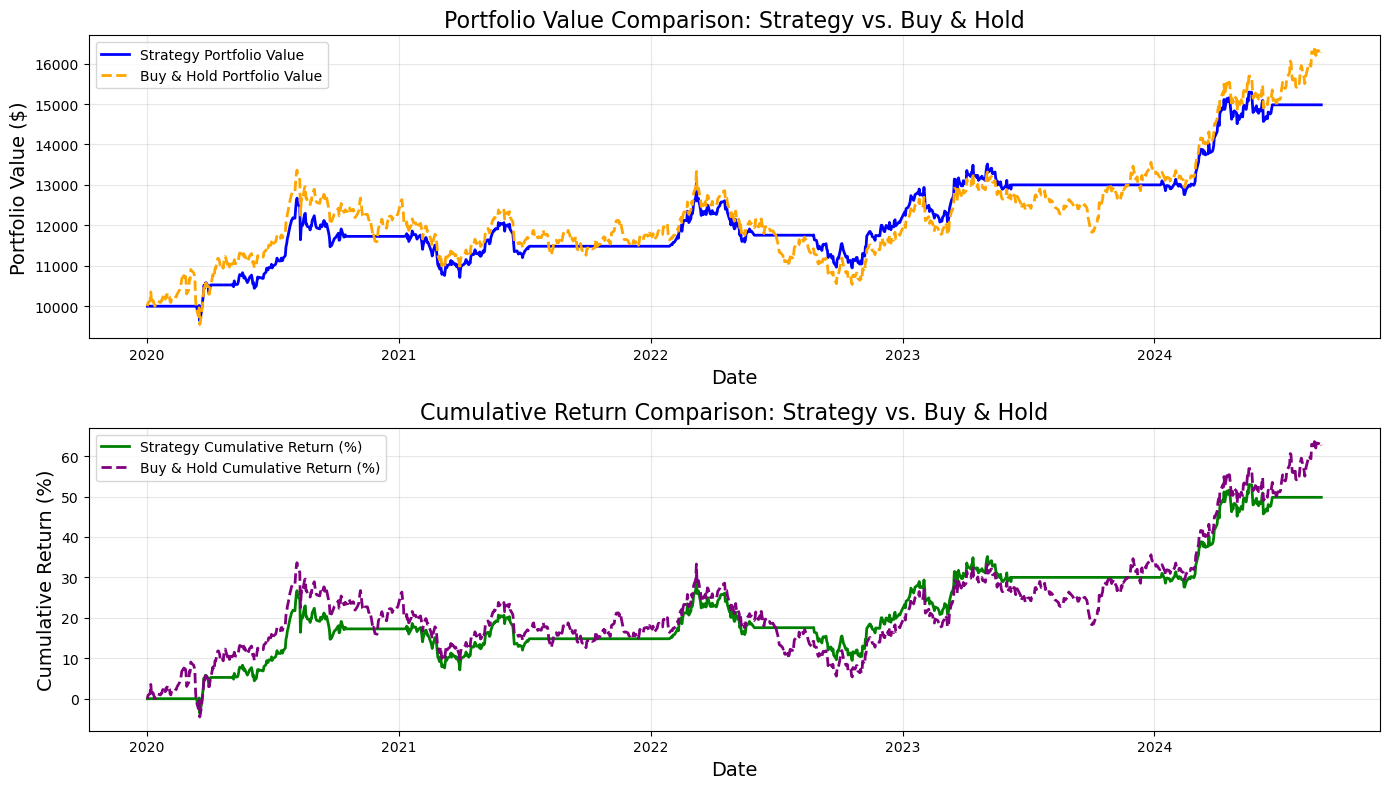

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate strategy portfolio cumulative returns
strategy_returns = np.array(portfolio_values) / initial_capital - 1

# Calculate buy-and-hold portfolio cumulative returns
buy_and_hold_portfolio_values = (
    initial_capital * (merged_data['Gold Price'] / merged_data['Gold Price'].iloc[0])
)
buy_and_hold_returns = buy_and_hold_portfolio_values / initial_capital - 1

# Calculate Sharpe Ratios
strategy_sharpe_ratio = np.sqrt(252) * (np.mean(np.diff(strategy_returns)) / np.std(np.diff(strategy_returns)))
buy_and_hold_sharpe_ratio = np.sqrt(252) * (np.mean(np.diff(buy_and_hold_returns)) / np.std(np.diff(buy_and_hold_returns)))

# Print the comparison
print("Performance Comparison:")
print(f"{'Metric':<25}{'Strategy':<15}{'Buy & Hold':<15}")
print(f"{'-'*55}")
print(f"{'Final Portfolio Value':<25}${portfolio_values[-1]:<15.2f}${buy_and_hold_portfolio_values.iloc[-1]:<15.2f}")
print(f"{'Cumulative Return (%)':<25}{strategy_returns[-1] * 100:<15.2f}{buy_and_hold_returns.iloc[-1] * 100:<15.2f}")
print(f"{'Sharpe Ratio':<25}{strategy_sharpe_ratio:<15.2f}{buy_and_hold_sharpe_ratio:<15.2f}")

# Plot Comparison of Portfolio Values and Cumulative Returns
plt.figure(figsize=(14, 8))

# Subplot 1: Portfolio Value Comparison
plt.subplot(2, 1, 1)
plt.plot(merged_data['Date'], portfolio_values, label='Strategy Portfolio Value', color='blue', linewidth=2)
plt.plot(merged_data['Date'], buy_and_hold_portfolio_values, label='Buy & Hold Portfolio Value', color='orange', linestyle='--', linewidth=2)
plt.title('Portfolio Value Comparison: Strategy vs. Buy & Hold', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Portfolio Value ($)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Subplot 2: Cumulative Return Comparison
plt.subplot(2, 1, 2)
plt.plot(merged_data['Date'], strategy_returns * 100, label='Strategy Cumulative Return (%)', color='green', linewidth=2)
plt.plot(merged_data['Date'], buy_and_hold_returns * 100, label='Buy & Hold Cumulative Return (%)', color='purple', linestyle='--', linewidth=2)
plt.title('Cumulative Return Comparison: Strategy vs. Buy & Hold', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return (%)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## Only technical analysis

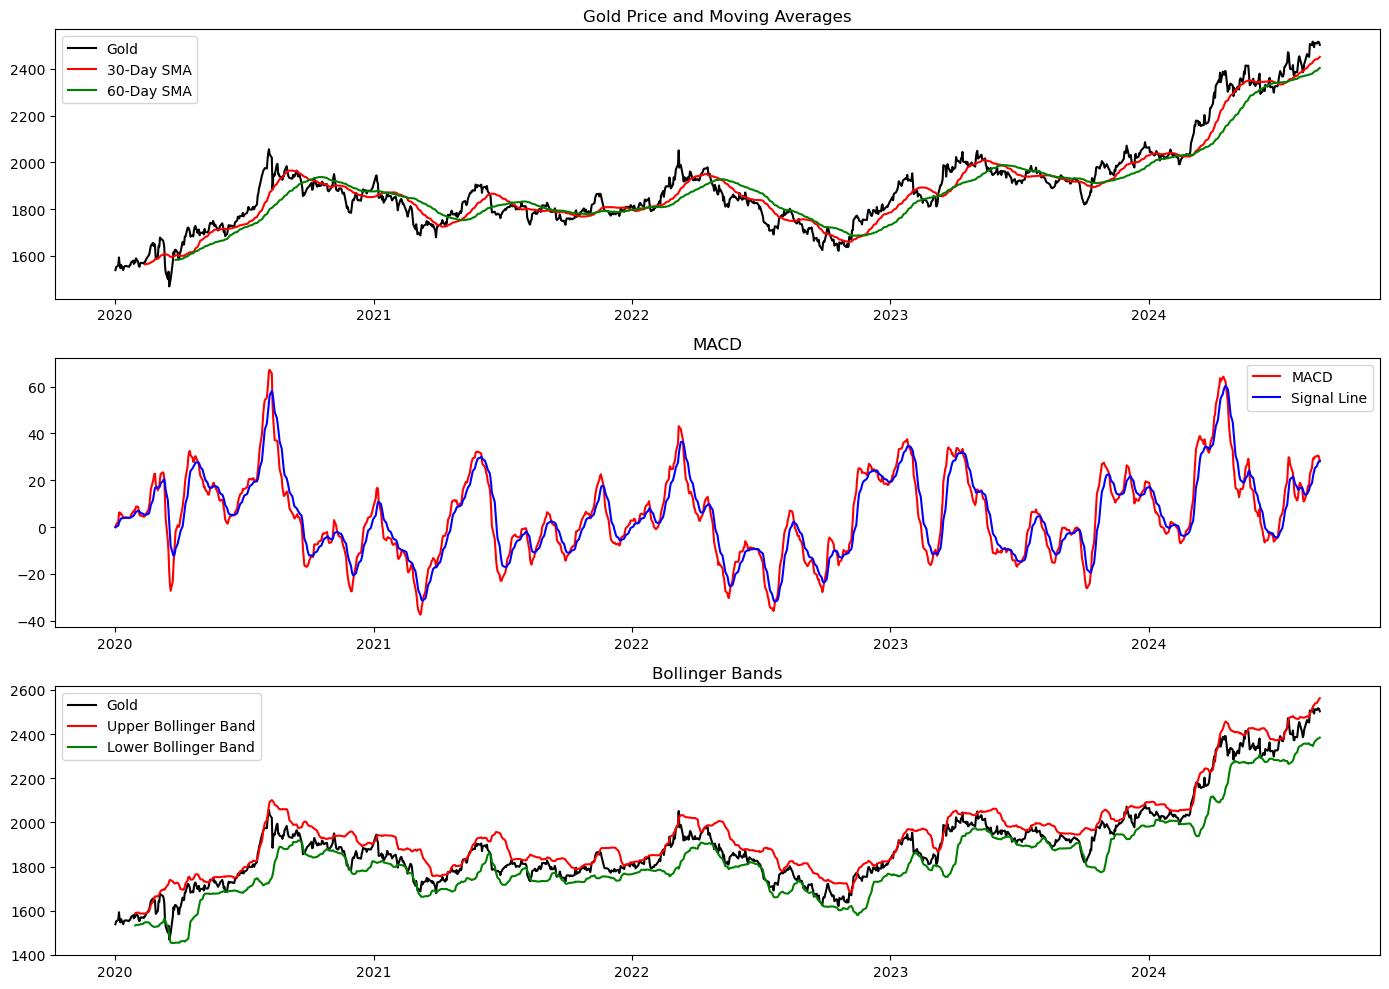

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('mereged_data_gold.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Simple Moving Average (SMA)
data['SMA_30'] = data['Gold Price'].rolling(window=30).mean()
data['SMA_60'] = data['Gold Price'].rolling(window=60).mean()

# Exponential Moving Average (EMA)
data['EMA_30'] = data['Gold Price'].ewm(span=30, adjust=False).mean()

# Relative Strength Index (RSI)
delta = data['Gold Price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
data['RSI'] = 100 - (100 / (1 + RS))

# MACD
exp1 = data['Gold Price'].ewm(span=12, adjust=False).mean()
exp2 = data['Gold Price'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Bollinger Bands
data['Middle_BB'] = data['Gold Price'].rolling(window=20).mean()
data['Upper_BB'] = data['Middle_BB'] + 2 * data['Gold Price'].rolling(window=20).std()
data['Lower_BB'] = data['Middle_BB'] - 2 * data['Gold Price'].rolling(window=20).std()

# Average True Range (ATR)
data['High-Low'] = data['Gold Price'].max() - data['Gold Price'].min()
data['High-Close'] = np.abs(data['Gold Price'].max() - data['Gold Price'].shift())
data['Low-Close'] = np.abs(data['Gold Price'].min() - data['Gold Price'].shift())
data['TR'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
data['ATR'] = data['TR'].rolling(window=14).mean()

# Trading Strategy
data['Signal'] = 0
data.loc[(data['MACD'] > data['Signal_Line']) & (data['RSI'] < 30), 'Signal'] = 1
data.loc[(data['MACD'] < data['Signal_Line']) & (data['RSI'] > 70), 'Signal'] = -1

# Calculate Returns
data['Return'] = np.log(data['Gold Price'] / data['Gold Price'].shift(1))
data['Strategy_Return'] = data['Return'] * data['Signal'].shift(1)

# Plot the data
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.title('Gold Price and Moving Averages')
plt.plot(data['Gold Price'], label='Gold', color='black')
plt.plot(data['SMA_30'], label='30-Day SMA', color='red')
plt.plot(data['SMA_60'], label='60-Day SMA', color='green')
plt.legend()

plt.subplot(3, 1, 2)
plt.title('MACD')
plt.plot(data['MACD'], label='MACD', color='red')
plt.plot(data['Signal_Line'], label='Signal Line', color='blue')
plt.legend()

plt.subplot(3, 1, 3)
plt.title('Bollinger Bands')
plt.plot(data['Gold Price'], label='Gold', color='black')
plt.plot(data['Upper_BB'], label='Upper Bollinger Band', color='red')
plt.plot(data['Lower_BB'], label='Lower Bollinger Band', color='green')
plt.legend()

plt.tight_layout()
plt.show()

# Save the results to a new CSV file
data.to_csv('analyzed_gold_data.csv')



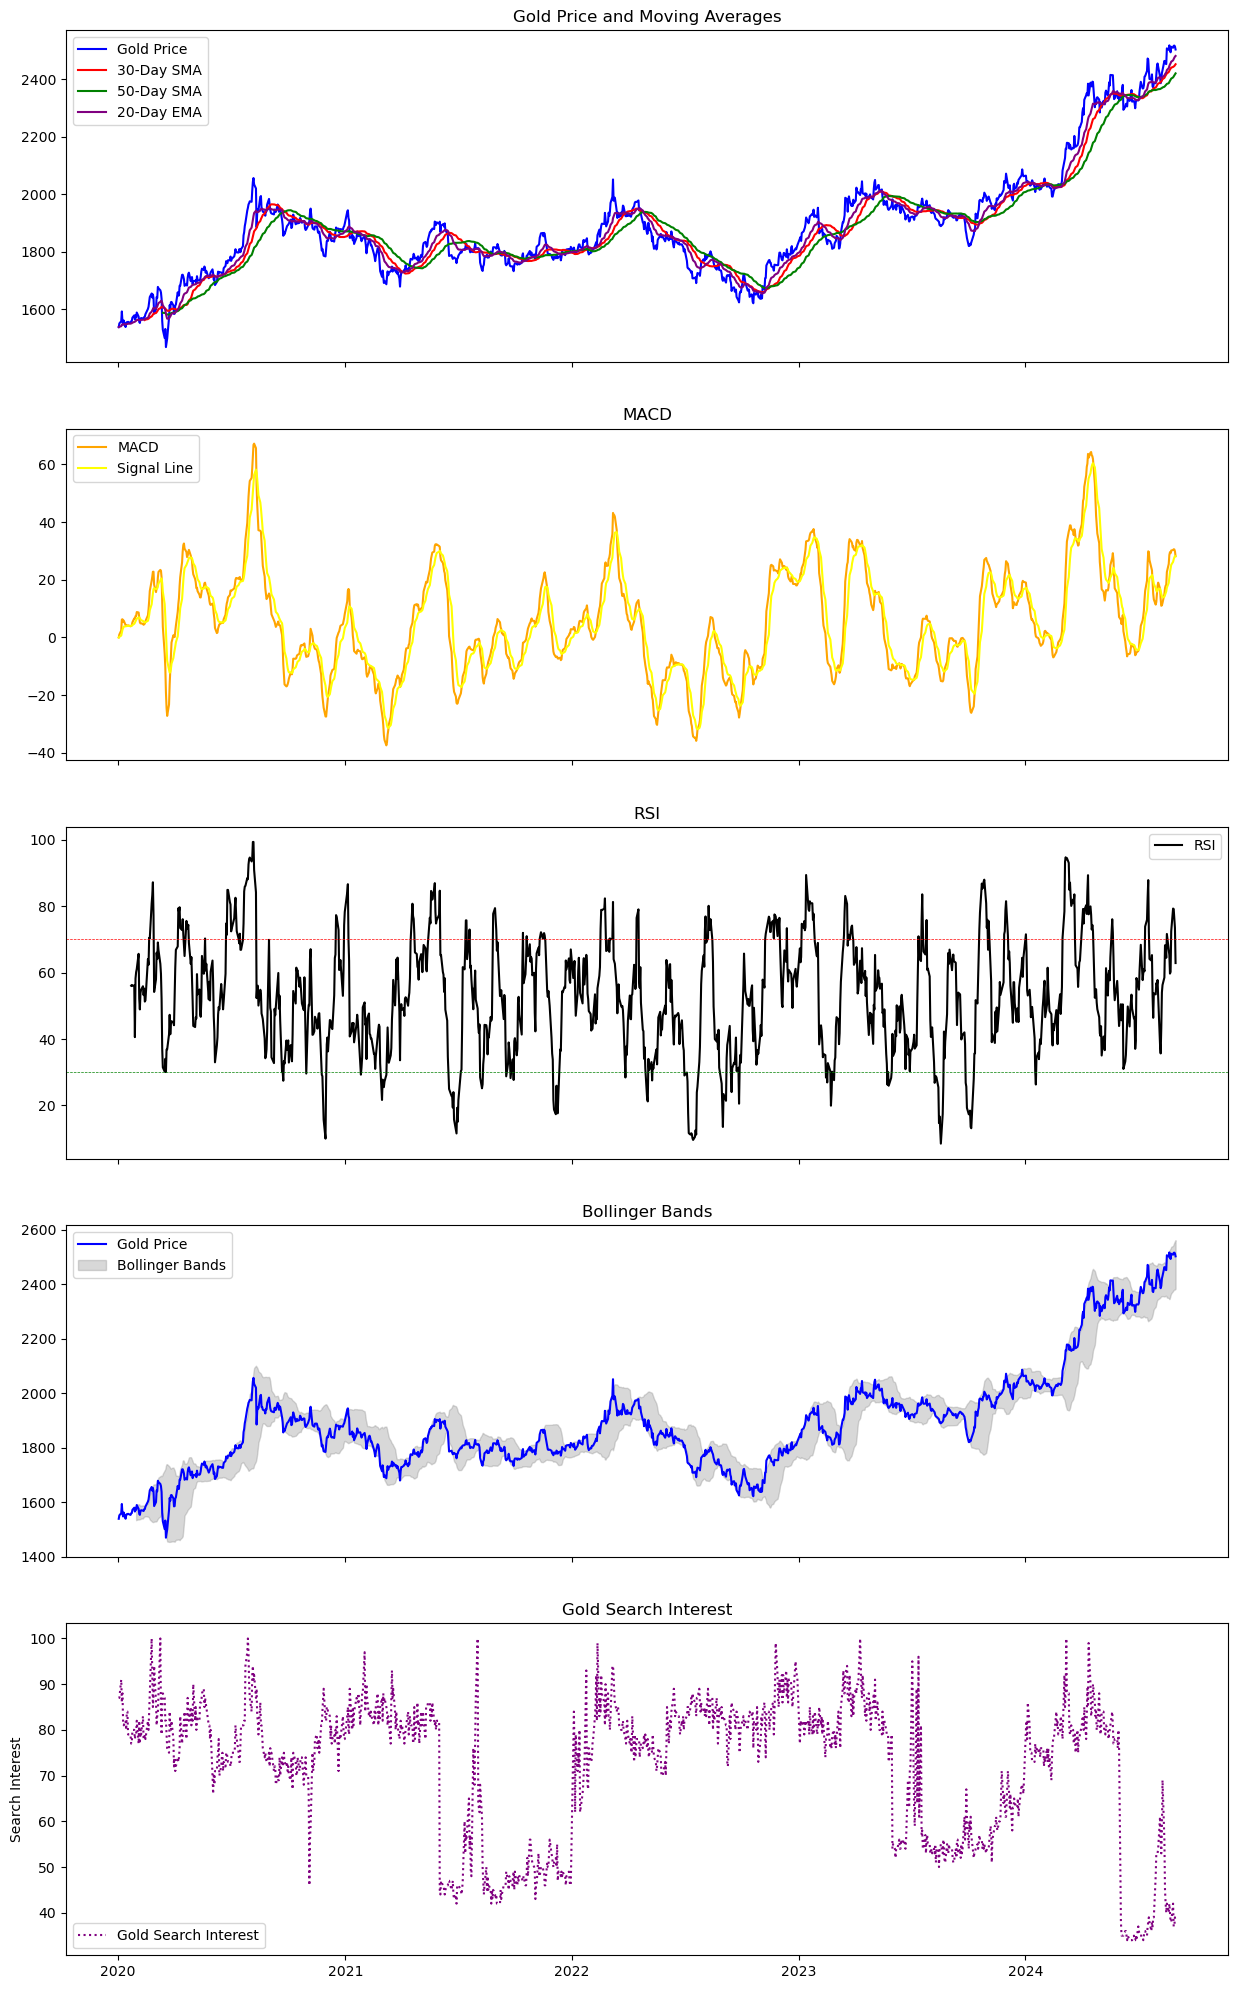

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mereged_data_gold.csv', parse_dates=['Date'], index_col='Date')

# Calculate Moving Averages
df['SMA_30'] = df['Gold Price'].rolling(window=30).mean()
df['SMA_50'] = df['Gold Price'].rolling(window=50).mean()

# Calculate Exponential Moving Average
df['EMA_20'] = df['Gold Price'].ewm(span=20, adjust=False).mean()

# Calculate MACD
df['MACD'] = df['Gold Price'].ewm(span=12, adjust=False).mean() - df['Gold Price'].ewm(span=26, adjust=False).mean()
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Calculate RSI
delta = df['Gold Price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Calculate Bollinger Bands
df['BB_middle'] = df['Gold Price'].rolling(window=20).mean()
df['BB_upper'] = df['BB_middle'] + 2 * df['Gold Price'].rolling(window=20).std()
df['BB_lower'] = df['BB_middle'] - 2 * df['Gold Price'].rolling(window=20).std()

# Plotting all indicators with individual subplots
fig, axes = plt.subplots(5, 1, figsize=(15, 25), sharex=True)

# Price and Moving Averages
axes[0].plot(df.index, df['Gold Price'], label='Gold Price', color='blue')
axes[0].plot(df.index, df['SMA_30'], label='30-Day SMA', color='red')
axes[0].plot(df.index, df['SMA_50'], label='50-Day SMA', color='green')
axes[0].plot(df.index, df['EMA_20'], label='20-Day EMA', color='purple')
axes[0].set_title('Gold Price and Moving Averages')
axes[0].legend()

# MACD
axes[1].plot(df.index, df['MACD'], label='MACD', color='orange')
axes[1].plot(df.index, df['MACD_signal'], label='Signal Line', color='yellow')
axes[1].set_title('MACD')
axes[1].legend()

# RSI
axes[2].plot(df.index, df['RSI'], label='RSI', color='black')
axes[2].axhline(70, color='red', linestyle='--', linewidth=0.5)
axes[2].axhline(30, color='green', linestyle='--', linewidth=0.5)
axes[2].set_title('RSI')
axes[2].legend()

# Bollinger Bands
axes[3].plot(df.index, df['Gold Price'], label='Gold Price', color='blue')
axes[3].fill_between(df.index, df['BB_upper'], df['BB_lower'], color='gray', alpha=0.3, label='Bollinger Bands')
axes[3].set_title('Bollinger Bands')
axes[3].legend()


# Gold Search Interest
axes[4].plot(df.index, df['Gold'], label='Gold Search Interest', color='purple', linestyle=':')
axes[4].set_title('Gold Search Interest')
axes[4].set_ylabel('Search Interest')
axes[4].legend()

plt.show()

df.to_csv('analyzed_gold_data.csv')

## Random Forest Model Testing

/var/folders/2v/418w7x5d03g34d38xmfssx8h0000gn/T/ipykernel_39760/3293694592.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_data.fillna(method='ffill', inplace=True)
/var/folders/2v/418w7x5d03g34d38xmfssx8h0000gn/T/ipykernel_39760/3293694592.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_data.fillna(method='bfill', inplace=True)


Train MSE: 23.08586489119437, Train R^2: 0.9996285090931573
Validation MSE: 560.7578951467926, Validation R^2: 0.934533066472722
Test MSE: 112068.10088307546, Test R^2: -0.580866974489098


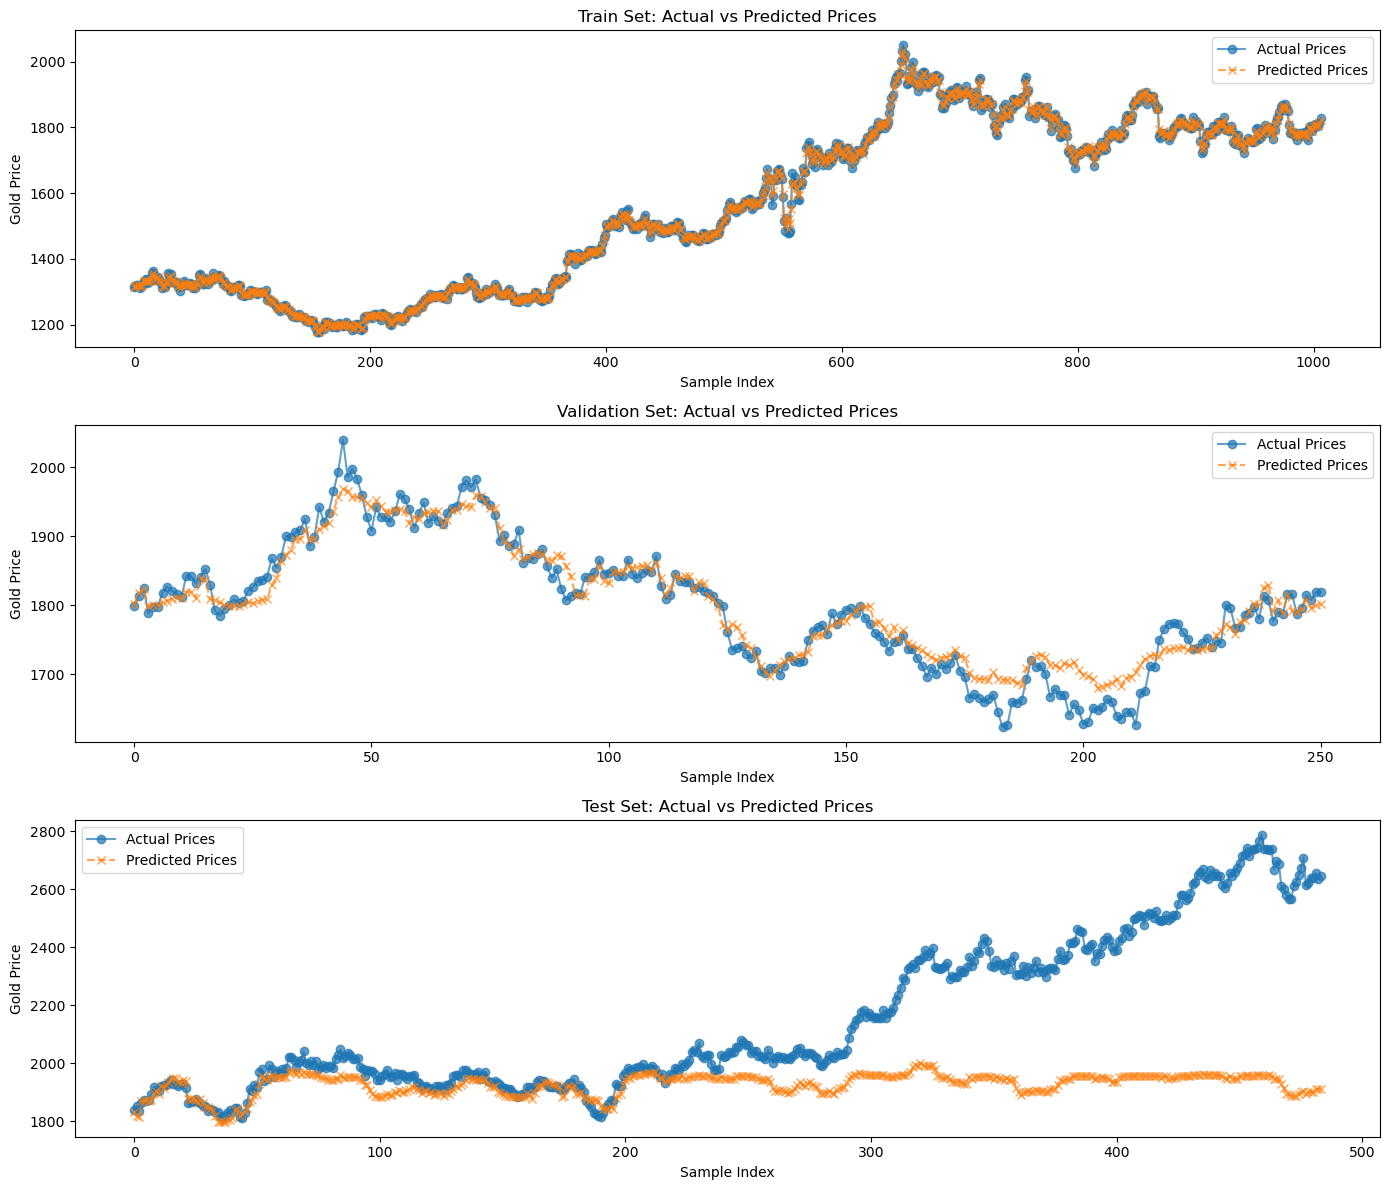

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
gold_data = pd.read_csv("analyzed_gold_data.csv")

# Convert Date column to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Handle missing values (forward fill and backward fill)
gold_data.fillna(method='ffill', inplace=True)
gold_data.fillna(method='bfill', inplace=True)

# Split the dataset based on time periods
train_data = gold_data[gold_data['Date'] < '2022-01-01']
val_data = gold_data[(gold_data['Date'] >= '2022-01-01') & (gold_data['Date'] < '2023-01-01')]
test_data = gold_data[gold_data['Date'] >= '2023-01-01']

# Prepare features (X) and target (y) for each split
X_train = train_data.drop(['Date', 'Gold Price'], axis=1)
y_train = train_data['Gold Price']

X_val = val_data.drop(['Date', 'Gold Price'], axis=1)
y_val = val_data['Gold Price']

X_test = test_data.drop(['Date', 'Gold Price'], axis=1)
y_test = test_data['Gold Price']

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluate metrics for train, validation, and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Train MSE: {mse_train}, Train R^2: {r2_train}")
print(f"Validation MSE: {mse_val}, Validation R^2: {r2_val}")
print(f"Test MSE: {mse_test}, Test R^2: {r2_test}")

# Plot actual vs predicted prices for each dataset
plt.figure(figsize=(14, 12))

# Train Set
plt.subplot(3, 1, 1)
plt.plot(y_train.values, label='Actual Prices', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_train_pred, label='Predicted Prices', marker='x', linestyle='--', alpha=0.7)
plt.title('Train Set: Actual vs Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Gold Price')
plt.legend()

# Validation Set
plt.subplot(3, 1, 2)
plt.plot(y_val.values, label='Actual Prices', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_val_pred, label='Predicted Prices', marker='x', linestyle='--', alpha=0.7)
plt.title('Validation Set: Actual vs Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Gold Price')
plt.legend()

# Test Set
plt.subplot(3, 1, 3)
plt.plot(y_test.values, label='Actual Prices', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_test_pred, label='Predicted Prices', marker='x', linestyle='--', alpha=0.7)
plt.title('Test Set: Actual vs Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Gold Price')
plt.legend()

plt.tight_layout()
plt.show()


## Hybrid Approach (holding and trading)

In [37]:
import pandas as pd

# Load the dataset
gold_data = pd.read_csv("analyzed_gold_data.csv")
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Initialize signals and actions
gold_data['Signal'] = 0  # Default signal

# Generate Buy/Sell Signals based on Technical Indicators
position_open = False  # Track if a position is open
for index, row in gold_data.iterrows():
    price = row['Gold Price']
    sma_30 = row['SMA_30']
    sma_50 = row['SMA_50']
    rsi = row['RSI']
    bb_middle = row['BB_middle']

    # Skip rows with missing data
    if pd.isna(sma_30) or pd.isna(sma_50) or pd.isna(rsi) or pd.isna(bb_middle):
        continue

    # Buy Signal: golden cross, RSI < 50, Price < BB_middle
    if not position_open and sma_30 > sma_50 and rsi < 50 and price < bb_middle:
        gold_data.at[index, 'Signal'] = 1
        position_open = True
        print(f"Buy signal generated at index {index}, price: {price}")

    # Sell Signal: death cross, RSI > 50, Price > BB_middle
    elif position_open and sma_30 < sma_50 and rsi > 50 and price > bb_middle:
        gold_data.at[index, 'Signal'] = -1
        position_open = False
        print(f"Sell signal generated at index {index}, price: {price}")
        
# Proceed with Hybrid Strategy
# Hybrid Strategy Parameters
initial_capital = 10000  # Starting capital
half_capital = initial_capital / 2  # Split equally for buy-and-hold and trading
trailing_stop_loss = 0.05  # 5% trailing stop-loss

# Buy-and-Hold Portion
initial_price = gold_data.iloc[0]['Gold Price']
final_price = gold_data.iloc[-1]['Gold Price']
ounces_bought_hold = half_capital / initial_price
buy_and_hold_profit_hybrid = (ounces_bought_hold * final_price) - half_capital

# Trading Portion
capital_trading = half_capital
position_trading = 0
highest_price_after_buy = 0  # Track highest price after buying
transactions_hybrid = []  # Store transactions

for index, row in gold_data.iterrows():
    signal = row['Signal']
    price = row['Gold Price']

    # Buy Signal
    if signal == 1 and position_trading == 0:
        ounces_bought = capital_trading / price
        position_trading += ounces_bought
        capital_trading = 0
        highest_price_after_buy = price
        transactions_hybrid.append({'Action': 'Buy', 'Price': price, 'Position': position_trading})

    # Sell Signal or Trailing Stop-Loss
    elif signal == -1 or (position_trading > 0 and price <= highest_price_after_buy * (1 - trailing_stop_loss)):
        capital_trading += position_trading * price
        transactions_hybrid.append({'Action': 'Sell', 'Price': price, 'Position': 0})
        position_trading = 0
        highest_price_after_buy = 0

    # Update highest price after buying
    if position_trading > 0:
        highest_price_after_buy = max(highest_price_after_buy, price)

# Final Valuation for Trading Portion
if position_trading > 0:
    capital_trading += position_trading * gold_data.iloc[-1]['Gold Price']
position_profit_hybrid = capital_trading - half_capital

# Total Hybrid Profit
total_hybrid_profit = buy_and_hold_profit_hybrid + position_profit_hybrid

# Save Transactions
transactions_hybrid_df = pd.DataFrame(transactions_hybrid)
transactions_hybrid_path = 'gold_trading_transactions_hybrid.csv'
transactions_hybrid_df.to_csv(transactions_hybrid_path, index=False)

# Hybrid Strategy Summary
hybrid_summary = {
    "Total Hybrid Profit": total_hybrid_profit,
    "Buy-and-Hold Portion Profit": buy_and_hold_profit_hybrid,
    "Trading Portion Profit": position_profit_hybrid,
    "Transactions Saved To": transactions_hybrid_path
}

print("Hybrid Strategy Summary:", hybrid_summary)


Buy signal generated at index 49, price: 1529.348
Sell signal generated at index 74, price: 1681.998
Buy signal generated at index 87, price: 1691.688
Sell signal generated at index 196, price: 1929.618
Buy signal generated at index 260, price: 1853.178
Sell signal generated at index 304, price: 1744.858
Buy signal generated at index 363, price: 1877.048
Sell signal generated at index 382, price: 1809.308
Buy signal generated at index 477, price: 1792.665
Sell signal generated at index 499, price: 1800.598
Buy signal generated at index 519, price: 1791.028
Sell signal generated at index 606, price: 1868.848
Buy signal generated at index 670, price: 1711.278
Sell signal generated at index 691, price: 1719.224
Buy signal generated at index 773, price: 1864.548
Sell signal generated at index 797, price: 1867.448
Buy signal generated at index 828, price: 1992.775
Sell signal generated at index 881, price: 1938.385
Buy signal generated at index 904, price: 1913.378
Sell signal generated at 

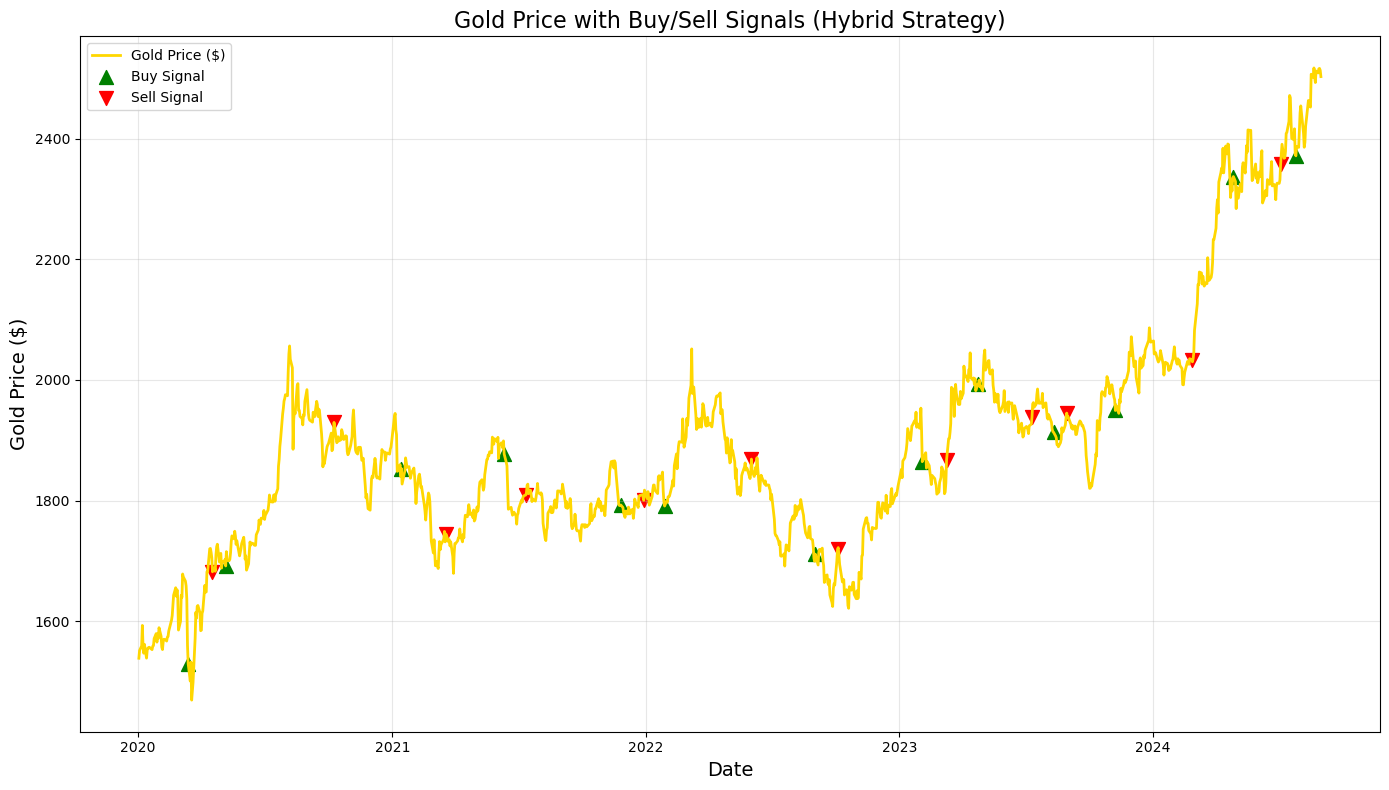

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
gold_data = pd.read_csv("analyzed_gold_data.csv")
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Initialize Signal column
gold_data['Signal'] = 0

# Signal Generation: Relaxed and Simplified
position_open = False
for index, row in gold_data.iterrows():
    price = row['Gold Price']
    sma_30 = row['SMA_30']
    sma_50 = row['SMA_50']
    rsi = row['RSI']
    bb_middle = row['BB_middle']

    # Skip rows with missing data
    if pd.isna(sma_30) or pd.isna(sma_50) or pd.isna(rsi) or pd.isna(bb_middle):
        continue

    # Buy Signal: golden cross, RSI < 50, Price <= BB_middle
    if not position_open and sma_30 > sma_50 and rsi < 50 and price <= bb_middle:
        gold_data.at[index, 'Signal'] = 1
        position_open = True

    # Sell Signal: death cross, RSI > 50, Price >= BB_middle
    elif position_open and sma_30 < sma_50 and rsi > 50 and price >= bb_middle:
        gold_data.at[index, 'Signal'] = -1
        position_open = False

# Plot Gold Prices with Buy/Sell Signals
plt.figure(figsize=(14, 8))

# Plot Gold Prices
plt.plot(gold_data['Date'], gold_data['Gold Price'], label='Gold Price ($)', color='gold', linewidth=2)

# Highlight Buy Signals
buy_signals = gold_data[gold_data['Signal'] == 1]
plt.scatter(
    buy_signals['Date'], 
    buy_signals['Gold Price'], 
    color='green', 
    label='Buy Signal', 
    marker='^', 
    s=100
)

# Highlight Sell Signals
sell_signals = gold_data[gold_data['Signal'] == -1]
plt.scatter(
    sell_signals['Date'], 
    sell_signals['Gold Price'], 
    color='red', 
    label='Sell Signal', 
    marker='v', 
    s=100
)

# Add titles and labels
plt.title('Gold Price with Buy/Sell Signals (Hybrid Strategy)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Gold Price ($)', fontsize=14)

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


## Hybrid Approach 2 (with pytrends)

Strategy Summary:
Initial Capital: $10000
Buy-and-Hold Profit: $3133.17
Trading Portion Profit: $1751.57
Total Hybrid Profit: $4884.74
Transactions saved to: gold_trading_transactions_hybrid_pytrends.csv
Total Hybrid Profit Percentage: 48.85%


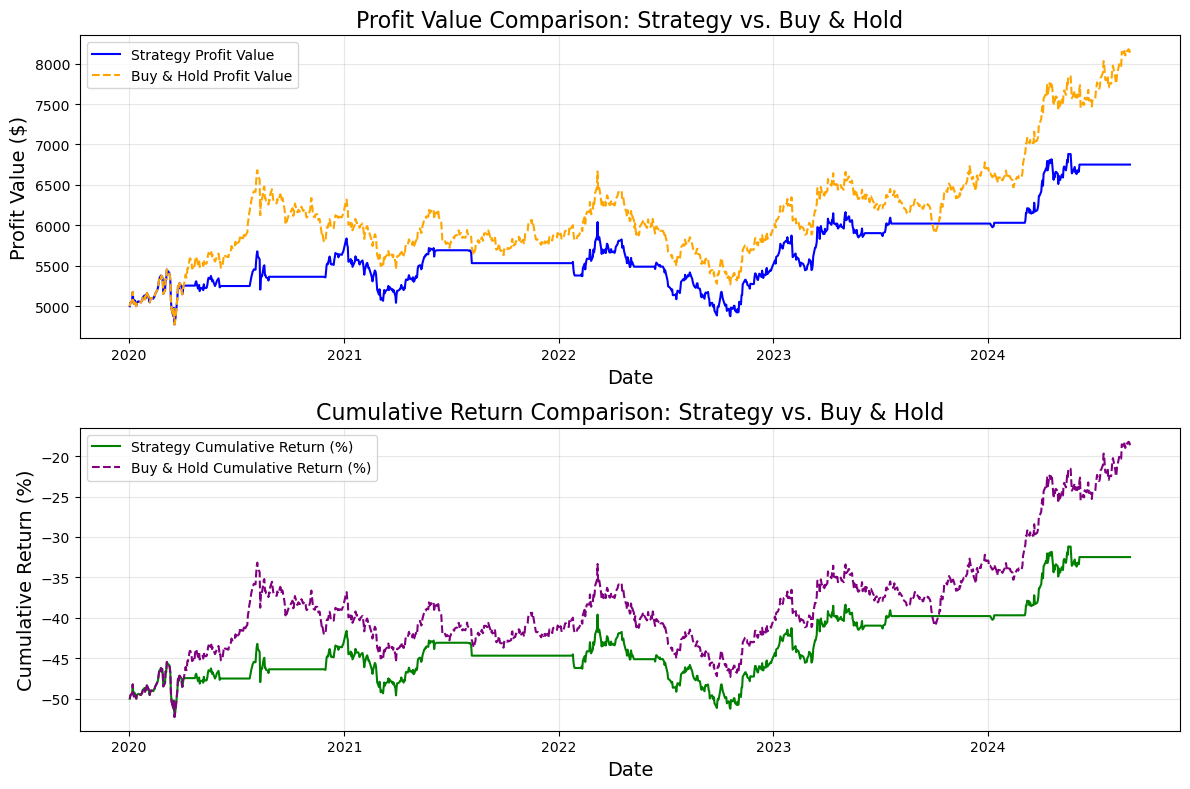

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Define high and low interest thresholds
high_threshold = 85  # Buy threshold
low_threshold = 77  # Sell threshold

# Add signals for interest levels
merged_data['Signal'] = 0
merged_data['Action'] = 'Hold'

# Track position and waiting period for sell signal
position_open = False
days_below_threshold = 0

for index, row in merged_data.iterrows():
    if not position_open and row['Gold'] > high_threshold:  # Buy signal
        merged_data.at[index, 'Signal'] = 1
        merged_data.at[index, 'Action'] = 'Buy'
        position_open = True
        days_below_threshold = 0  # Reset days below threshold
    elif position_open:
        if row['Gold'] < low_threshold:  # Below sell threshold
            days_below_threshold += 1
        else:
            days_below_threshold = 0  # Reset counter if above threshold

        if days_below_threshold >= 4:  # Sell condition met
            merged_data.at[index, 'Signal'] = -1
            merged_data.at[index, 'Action'] = 'Sell'
            position_open = False
            days_below_threshold = 0  # Reset counter after selling

# Ensure the last trade ends with a buy signal
if merged_data.iloc[-1]['Signal'] != 1:
    merged_data.at[merged_data.index[-1], 'Signal'] = 1
    merged_data.at[merged_data.index[-1], 'Action'] = 'Buy'

# Hybrid Strategy Parameters
initial_capital = 10000
half_capital = initial_capital / 2  # 50% for buy-and-hold, 50% for trading
capital_trading = half_capital
position_trading = 0  # Current position for trading portion
position_hold = half_capital / merged_data.iloc[0]['Gold Price']  # Gold bought for buy-and-hold
transactions_hybrid = []
strategy_portfolio_values = []  # Track hybrid portfolio values
buy_and_hold_values = []  # Track buy-and-hold portfolio values

# Execute trading based on signals
for index, row in merged_data.iterrows():
    signal = row['Signal']
    price = row['Gold Price']

    # Track portfolio values for both strategies
    strategy_portfolio_values.append(capital_trading + (position_trading * price))
    buy_and_hold_values.append(position_hold * price)

    # Buy Signal
    if signal == 1 and position_trading == 0:
        ounces_bought = capital_trading / price
        position_trading += ounces_bought
        capital_trading = 0
        transactions_hybrid.append({'Action': 'Buy', 'Price': price, 'Position': position_trading})

    # Sell Signal
    elif signal == -1 and position_trading > 0:
        capital_trading += position_trading * price
        transactions_hybrid.append({'Action': 'Sell', 'Price': price, 'Position': 0})
        position_trading = 0

# Final Valuation for Trading Portion
if position_trading > 0:
    capital_trading += position_trading * merged_data.iloc[-1]['Gold Price']

# Final Valuation for Buy-and-Hold Portion
final_price = merged_data.iloc[-1]['Gold Price']
buy_and_hold_profit = (position_hold * final_price) - half_capital
trading_profit = capital_trading - half_capital
total_hybrid_profit = buy_and_hold_profit + trading_profit

# Save Transactions
transactions_hybrid_df = pd.DataFrame(transactions_hybrid)
transactions_hybrid_path = 'gold_trading_transactions_hybrid_pytrends.csv'
transactions_hybrid_df.to_csv(transactions_hybrid_path, index=False)

# Correctly calculate cumulative returns for both strategies
strategy_cumulative_returns = [(v / initial_capital - 1) * 100 for v in strategy_portfolio_values]
buy_and_hold_cumulative_returns = [(v / initial_capital - 1) * 100 for v in buy_and_hold_values]

# Print strategy summary
print("Strategy Summary:")
print(f"Initial Capital: ${initial_capital}")
print(f"Buy-and-Hold Profit: ${buy_and_hold_profit:.2f}")
print(f"Trading Portion Profit: ${trading_profit:.2f}")
print(f"Total Hybrid Profit: ${total_hybrid_profit:.2f}")
print(f"Transactions saved to: {transactions_hybrid_path}")
total_hybrid_profit = buy_and_hold_profit + trading_profit

total_hybrid_profit_percentage = (total_hybrid_profit / initial_capital) * 100
print(f"Total Hybrid Profit Percentage: {total_hybrid_profit_percentage:.2f}%")
# Plot Portfolio Value Comparison
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(merged_data['Date'], strategy_portfolio_values, label='Strategy Profit Value', color='blue')
plt.plot(merged_data['Date'], buy_and_hold_values, label='Buy & Hold Profit Value', color='orange', linestyle='--')
plt.title('Profit Value Comparison: Strategy vs. Buy & Hold', fontsize=16)
plt.ylabel('Profit Value ($)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Plot Cumulative Return Comparison
plt.subplot(2, 1, 2)
plt.plot(merged_data['Date'], strategy_cumulative_returns, label='Strategy Cumulative Return (%)', color='green')
plt.plot(merged_data['Date'], buy_and_hold_cumulative_returns, label='Buy & Hold Cumulative Return (%)', color='purple', linestyle='--')
plt.title('Cumulative Return Comparison: Strategy vs. Buy & Hold', fontsize=16)
plt.ylabel('Cumulative Return (%)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Display the plots
plt.tight_layout()
plt.show()


Strategy Summary:
Initial Capital: $10000
Buy-and-Hold Profit: $3133.17
Trading Portion Profit: $1751.57
Total Hybrid Profit: $4884.74
Total Hybrid Profit Percentage: 48.85%
Hybrid Strategy Sharpe Ratio: 0.03
Transactions saved to: gold_trading_transactions_hybrid_pytrends.csv


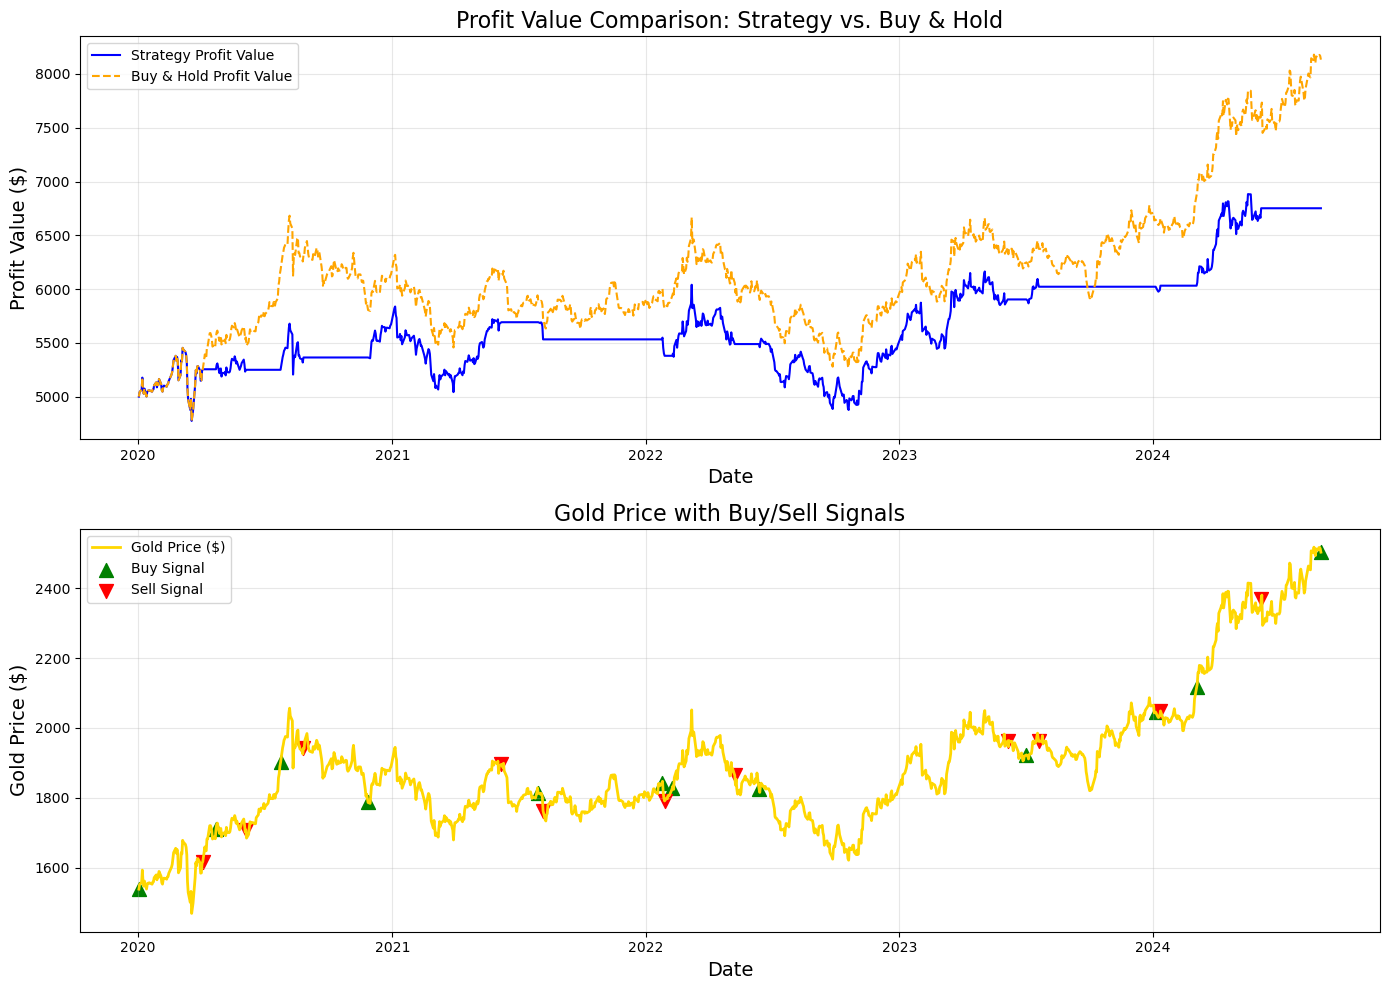

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define high and low interest thresholds
high_threshold = 85  # Buy threshold
low_threshold = 77  # Sell threshold

# Add signals for interest levels
merged_data['Signal'] = 0
merged_data['Action'] = 'Hold'

# Track position and waiting period for sell signal
position_open = False
days_below_threshold = 0

for index, row in merged_data.iterrows():
    if not position_open and row['Gold'] > high_threshold:  # Buy signal
        merged_data.at[index, 'Signal'] = 1
        merged_data.at[index, 'Action'] = 'Buy'
        position_open = True
        days_below_threshold = 0  # Reset days below threshold
    elif position_open:
        if row['Gold'] < low_threshold:  # Below sell threshold
            days_below_threshold += 1
        else:
            days_below_threshold = 0  # Reset counter if above threshold

        if days_below_threshold >= 4:  # Sell condition met
            merged_data.at[index, 'Signal'] = -1
            merged_data.at[index, 'Action'] = 'Sell'
            position_open = False
            days_below_threshold = 0  # Reset counter after selling

# Ensure the last trade ends with a buy signal
if merged_data.iloc[-1]['Signal'] != 1:
    merged_data.at[merged_data.index[-1], 'Signal'] = 1
    merged_data.at[merged_data.index[-1], 'Action'] = 'Buy'

# Hybrid Strategy Parameters
initial_capital = 10000
half_capital = initial_capital / 2  # 50% for buy-and-hold, 50% for trading
capital_trading = half_capital
position_trading = 0  # Current position for trading portion
position_hold = half_capital / merged_data.iloc[0]['Gold Price']  # Gold bought for buy-and-hold
transactions_hybrid = []
strategy_portfolio_values = []  # Track hybrid portfolio values
buy_and_hold_values = []  # Track buy-and-hold portfolio values

# Execute trading based on signals
for index, row in merged_data.iterrows():
    signal = row['Signal']
    price = row['Gold Price']

    # Track portfolio values for both strategies
    strategy_portfolio_values.append(capital_trading + (position_trading * price))
    buy_and_hold_values.append(position_hold * price)

    # Buy Signal
    if signal == 1 and position_trading == 0:
        ounces_bought = capital_trading / price
        position_trading += ounces_bought
        capital_trading = 0
        transactions_hybrid.append({'Action': 'Buy', 'Price': price, 'Position': position_trading})

    # Sell Signal
    elif signal == -1 and position_trading > 0:
        capital_trading += position_trading * price
        transactions_hybrid.append({'Action': 'Sell', 'Price': price, 'Position': 0})
        position_trading = 0

# Final Valuation for Trading Portion
if position_trading > 0:
    capital_trading += position_trading * merged_data.iloc[-1]['Gold Price']

# Final Valuation for Buy-and-Hold Portion
final_price = merged_data.iloc[-1]['Gold Price']
buy_and_hold_profit = (position_hold * final_price) - half_capital
trading_profit = capital_trading - half_capital
total_hybrid_profit = buy_and_hold_profit + trading_profit

# Save Transactions
transactions_hybrid_df = pd.DataFrame(transactions_hybrid)
transactions_hybrid_path = 'gold_trading_transactions_hybrid_pytrends.csv'
transactions_hybrid_df.to_csv(transactions_hybrid_path, index=False)

# Calculate cumulative returns based on total portfolio values
strategy_cumulative_returns = [(v / initial_capital - 1) * 100 for v in strategy_portfolio_values]
buy_and_hold_cumulative_returns = [(v / initial_capital - 1) * 100 for v in buy_and_hold_values]

# Calculate daily returns for Sharpe Ratio
strategy_daily_returns = np.diff(strategy_portfolio_values) / strategy_portfolio_values[:-1]
risk_free_rate = 0.02 / 252  # Daily risk-free rate (2% annualized)

# Sharpe Ratio for Hybrid Strategy
strategy_sharpe_ratio = (np.mean(strategy_daily_returns) - risk_free_rate) / np.std(strategy_daily_returns)

# Extract buy and sell signals for plotting
buy_signals = merged_data[merged_data['Signal'] == 1]
sell_signals = merged_data[merged_data['Signal'] == -1]

# Print strategy summary
total_hybrid_profit_percentage = (total_hybrid_profit / initial_capital) * 100
print("Strategy Summary:")
print(f"Initial Capital: ${initial_capital}")
print(f"Buy-and-Hold Profit: ${buy_and_hold_profit:.2f}")
print(f"Trading Portion Profit: ${trading_profit:.2f}")
print(f"Total Hybrid Profit: ${total_hybrid_profit:.2f}")
print(f"Total Hybrid Profit Percentage: {total_hybrid_profit_percentage:.2f}%")
print(f"Hybrid Strategy Sharpe Ratio: {strategy_sharpe_ratio:.2f}")
print(f"Transactions saved to: {transactions_hybrid_path}")

# Plot Portfolio Value Comparison
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_data['Date'], strategy_portfolio_values, label='Strategy Profit Value', color='blue')
plt.plot(merged_data['Date'], buy_and_hold_values, label='Buy & Hold Profit Value', color='orange', linestyle='--')
plt.title('Profit Value Comparison: Strategy vs. Buy & Hold', fontsize=16)
plt.ylabel('Profit Value ($)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)


# Plot Signals on Gold Price
plt.subplot(2, 1, 2)
plt.plot(merged_data['Date'], merged_data['Gold Price'], label='Gold Price ($)', color='gold', linewidth=2)
plt.scatter(buy_signals['Date'], buy_signals['Gold Price'], color='green', label='Buy Signal', marker='^', s=100)
plt.scatter(sell_signals['Date'], sell_signals['Gold Price'], color='red', label='Sell Signal', marker='v', s=100)
plt.title('Gold Price with Buy/Sell Signals', fontsize=16)
plt.ylabel('Gold Price ($)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Display the plots
plt.tight_layout()
plt.show()
